# LOAN DATASET
Using the above dataset to build a Model using Multinomial Regression model to predict the loan status of the customer

## BUSINESS OBJECTIVE
* Maximize profit
* Minimize defaulters
* Maximize loan accounts
* Maximize accurate prediction

## CONSTRAINTS
* Death
* Financial slowdown

## DATA DICTIONARY

| **slno** |      **Name of Feature**     | **Description**                                                          | **Type** | **Relevance** |
|:--------:|:----------------------------|:--------------------------------------------------------------------------|:--------:|:-------------:|
| 1 | loan_status | The status of the loan: fully paid, charged off or current| Nominal    | Relevant      |
| 2 | loan_amnt   | The listed amount of the loan applied for by the borrower   | Ratio    | Relevant      |
| 3 | term        | The number of payments on the loan. Values are in months and can be either 36 or 60. | Ratio  | Relevant   |
| 4 | int_rate    | The interest rate of the loan| Ratio    | Relevant      |
| 5 | installment | The monthly installments owed by the borrower if the loan is funded. | Ratio    | Relevant      |
| 6 | annual_inc  | The self-reported annual income of the borrower.| Ratio   | Relevant      |
| 7 | dti         | The debt-to-income ratio of the borrower (amount of debt divided by annual income).| Ratio| Relevant      |
| 8 | delinq_2yrs | The number of times the borrower had been 30+ days past due on a payment in the past 2 years| Ratio | Relevant      |
| 9 | inq_last_6mths | The borrower’s number of inquiries by creditors in the last 6 months.| Ratio | Relevant      |
| 10 | open_acc       | The number of open credit lines in the borrower's credit file.| Ratio | Relevant      |
| 11 | pub_rec | The borrower’s number of derogatory public records (bankruptcy filings, tax liens, or judgments)| Ratio| Relevant      |
| 12 | revol_bal| The borrower’s revolving balance (amount unpaid at the end of the credit card billing cycle).| Ratio| Relevant      |
| 13 | revol_util | The borrower’s revolving line utilization rate (the amount of the credit line used relative to total credit available).| Ratio| Relevant      |
| 14 | total_acc    | The total number of credit lines currently in the borrower's credit file    | Ratio | Relevant      |
| 15 | out_prncp    | Remaining outstanding principal for total amount funded| Ratio| Relevant      |
| 16 | collection_recovery_fee    | The recovery fee recieved     | Ratio| Relevant      |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored
from sklearn.model_selection import train_test_split

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass24\loan.csv")
df=df0.copy()
df.head()

C:\Users\lenny\AppData\Local\Temp\ipykernel_34744\1778712982.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass24\loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(39717, 111)

In [4]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


Checking the Number of Duplicates in the Dataset.

In [7]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  0


Checking the Number and Percentage of Missing Values in the Dataset.

In [8]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64


Dropping all the columns which has more than 100 missing values. there are about 50 columns in which the entire column has nan values.And also dropping the records which has nan values. 

In [9]:
df.dropna(axis=1, how='all', inplace=True)
df.drop(['next_pymnt_d', 'mths_since_last_record','mths_since_last_delinq','desc','emp_title','emp_length' ,'pub_rec_bankruptcies' ],axis=1,inplace=True)
df.dropna(inplace=True)
df.reset_index(inplace=True,drop=True)

Again checking the number of missing values in the dataset after reseting the index values. 

In [10]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 id                            0
total_rec_late_fee            0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
recoveries                    0
member_id                     0
collection_recovery_fee       0
last_pymnt_d                  0
last_pymnt_amnt               0
last_credit_pull_d            0
collections_12_mths_ex_med    0
policy_code                   0
application_type              0
acc_now_delinq                0
chargeoff_within_12_mths      0
delinq_amnt                   0
pub_rec                       0
open_acc                      0
inq_last_6mths                0
earliest_cr_line              0
loan_amnt                     0
funded_amnt                   0
funded_amnt_i

Checking the number of uniques in each variable.

In [11]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 id                            39531
member_id                     39531
loan_amnt                       884
funded_amnt                    1040
funded_amnt_inv                8192
term                              2
int_rate                        371
installment                   15315
grade                             7
sub_grade                        35
home_ownership                    5
annual_inc                     5299
verification_status               3
issue_d                          53
loan_status                       3
pymnt_plan                        1
url                           39531
purpose                          14
title                         19509
zip_code                        821
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                         40
pub_rec                           5
r

Dropping the columns which have only one value through out the entire column. 

In [12]:
df.drop(['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type','policy_code','collections_12_mths_ex_med','initial_list_status','pymnt_plan'],axis=1,inplace=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16


Dropping the columns which are irrelevant for model building. 

In [13]:
df.drop(['id', 'member_id', 'funded_amnt', 'funded_amnt_inv','grade', 'sub_grade','verification_status', 'issue_d',
         'url', 'purpose', 'title', 'zip_code', 'addr_state','earliest_cr_line','out_prncp_inv','total_pymnt', 'total_pymnt_inv', 
         'total_rec_prncp','total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_d', 'last_pymnt_amnt','last_credit_pull_d'],
       axis=1,inplace=True)
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,collection_recovery_fee
0,5000,36 months,10.65%,162.87,RENT,24000.0,Fully Paid,27.65,0,1,3,0,13648,83.70%,9,0.00,0.00
1,2500,60 months,15.27%,59.83,RENT,30000.0,Charged Off,1.00,0,5,3,0,1687,9.40%,4,0.00,1.11
2,2400,36 months,15.96%,84.33,RENT,12252.0,Fully Paid,8.72,0,2,2,0,2956,98.50%,10,0.00,0.00
3,10000,36 months,13.49%,339.31,RENT,49200.0,Fully Paid,20.00,0,1,10,0,5598,21%,37,0.00,0.00
4,3000,60 months,12.69%,67.79,RENT,80000.0,Current,17.94,0,0,15,0,27783,53.90%,38,524.06,0.00


Converting the term variable to integer and the interest rate and revolving utilization variable  to float data type. 

In [14]:
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float') / 100.0
df['revol_util'] = df['revol_util'].str.rstrip('%').astype('float') / 100.0
df['term'] = df['term'].str.rstrip('months').astype('int64') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39531 entries, 0 to 39530
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39531 non-null  int64  
 1   term                     39531 non-null  int64  
 2   int_rate                 39531 non-null  float64
 3   installment              39531 non-null  float64
 4   home_ownership           39531 non-null  object 
 5   annual_inc               39531 non-null  float64
 6   loan_status              39531 non-null  object 
 7   dti                      39531 non-null  float64
 8   delinq_2yrs              39531 non-null  int64  
 9   inq_last_6mths           39531 non-null  int64  
 10  open_acc                 39531 non-null  int64  
 11  pub_rec                  39531 non-null  int64  
 12  revol_bal                39531 non-null  int64  
 13  revol_util               39531 non-null  float64
 14  total_acc             

Rearranging the columns so that the output variable comes first. 

In [15]:
df=df.loc[:,['loan_status','loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
             'annual_inc',  'dti', 'delinq_2yrs', 'inq_last_6mths',
             'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
             'out_prncp', 'collection_recovery_fee']]
df.head()

,loan_status,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,collection_recovery_fee
0,Fully Paid,5000,36,0.1065,162.87,RENT,24000.0,27.65,0,1,3,0,13648,0.837,9,0.00,0.00
1,Charged Off,2500,60,0.1527,59.83,RENT,30000.0,1.00,0,5,3,0,1687,0.094,4,0.00,1.11
2,Fully Paid,2400,36,0.1596,84.33,RENT,12252.0,8.72,0,2,2,0,2956,0.985,10,0.00,0.00
3,Fully Paid,10000,36,0.1349,339.31,RENT,49200.0,20.00,0,1,10,0,5598,0.210,37,0.00,0.00
4,Current,3000,60,0.1269,67.79,RENT,80000.0,17.94,0,0,15,0,27783,0.539,38,524.06,0.00


### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [16]:
df.mean()

C:\Users\lenny\AppData\Local\Temp\ipykernel_34744\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


loan_amnt                  11240.396145
term                          42.433634
int_rate                       0.120165
installment                  325.094419
annual_inc                 69014.673773
dti                           13.328431
delinq_2yrs                    0.146240
inq_last_6mths                 0.868609
open_acc                       9.303180
pub_rec                        0.055020
revol_bal                  13410.979231
revol_util                     0.488570
total_acc                     22.118236
out_prncp                     51.468923
collection_recovery_fee       12.313712
dtype: float64

In [17]:
df.median()

C:\Users\lenny\AppData\Local\Temp\ipykernel_34744\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


loan_amnt                  10000.0000
term                          36.0000
int_rate                       0.1183
installment                  280.9700
annual_inc                 59000.0000
dti                           13.4100
delinq_2yrs                    0.0000
inq_last_6mths                 1.0000
open_acc                       9.0000
pub_rec                        0.0000
revol_bal                   8877.0000
revol_util                     0.4930
total_acc                     20.0000
out_prncp                      0.0000
collection_recovery_fee        0.0000
dtype: float64

In [18]:
stats.mode(df)

C:\Users\lenny\AppData\Local\Temp\ipykernel_34744\4235401754.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(df)
C:\Users\lenny\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\lenny\AppData\Local\Temp\ipykernel_34744\4235401754.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/r

ModeResult(mode=array([['Fully Paid', 10000, 36, 0.1099, 311.11, 'RENT', 60000.0, 0.0, 0,
        0, 7, 0, 0, 0.0, 16, 0.0, 0.0]], dtype=object), count=array([[32856,  2825, 28934,   956,    68, 18793,  1502,   174, 35243,
        19218,  4002, 37427,   942,   973,  1465, 38391, 35817]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [19]:
df.var()

C:\Users\lenny\AppData\Local\Temp\ipykernel_34744\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


loan_amnt                  5.559611e+07
term                       1.130184e+02
int_rate                   1.387393e-03
installment                4.362426e+04
annual_inc                 4.075048e+09
dti                        4.454522e+01
delinq_2yrs                2.411229e-01
inq_last_6mths             1.144891e+00
open_acc                   1.934929e+01
pub_rec                    5.624415e-02
revol_bal                  2.525732e+08
revol_util                 8.024029e-02
total_acc                  1.298731e+02
out_prncp                  1.414045e+05
collection_recovery_fee    2.206062e+04
dtype: float64

In [20]:
df.std()

C:\Users\lenny\AppData\Local\Temp\ipykernel_34744\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


loan_amnt                   7456.279941
term                          10.631013
int_rate                       0.037248
installment                  208.864216
annual_inc                 63836.100015
dti                            6.674220
delinq_2yrs                    0.491043
inq_last_6mths                 1.069996
open_acc                       4.398783
pub_rec                        0.237158
revol_bal                  15892.553217
revol_util                     0.283267
total_acc                     11.396188
out_prncp                    376.037955
collection_recovery_fee      148.528171
dtype: float64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [21]:
df.skew()

C:\Users\lenny\AppData\Local\Temp\ipykernel_34744\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


loan_amnt                   1.057619
term                        1.047247
int_rate                    0.294542
installment                 1.127373
annual_inc                 31.024061
dti                        -0.028138
delinq_2yrs                 5.029225
inq_last_6mths              1.393036
open_acc                    1.005785
pub_rec                     4.543212
revol_bal                   3.191829
revol_util                 -0.034962
total_acc                   0.827905
out_prncp                   9.204402
collection_recovery_fee    25.157573
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [22]:
df.kurt()

C:\Users\lenny\AppData\Local\Temp\ipykernel_34744\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


loan_amnt                     0.765358
term                         -0.903320
int_rate                     -0.445442
installment                   1.246123
annual_inc                 2307.324404
dti                          -0.850973
delinq_2yrs                  39.616849
inq_last_6mths                2.578545
open_acc                      1.684218
pub_rec                      23.961752
revol_bal                    14.903404
revol_util                   -1.104663
total_acc                     0.696522
out_prncp                    97.181189
collection_recovery_fee     827.762569
dtype: float64

### GRAPHICAL REPRESENTATION

Using the countplots and distribution plots to understand the different variables.

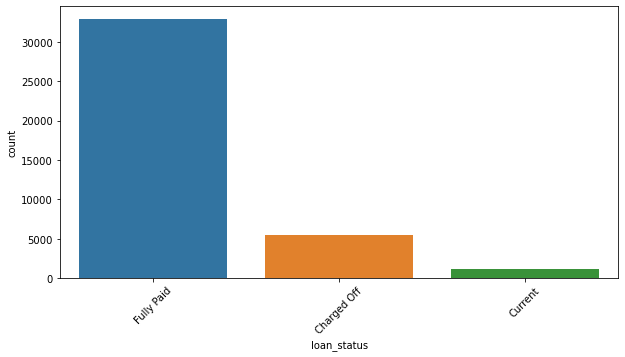

In [23]:
plt.figure(1, figsize=(10, 5))
sns.countplot(x=df["loan_status"])
plt.xticks(rotation = 45)
plt.show()

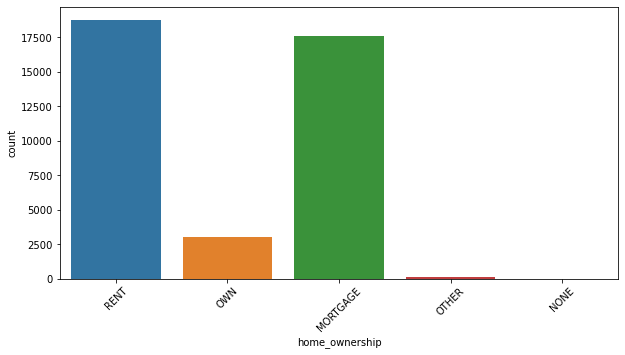

In [24]:
plt.figure(1, figsize=(10, 5))
sns.countplot(x=df["home_ownership"])
plt.xticks(rotation = 45)
plt.show()

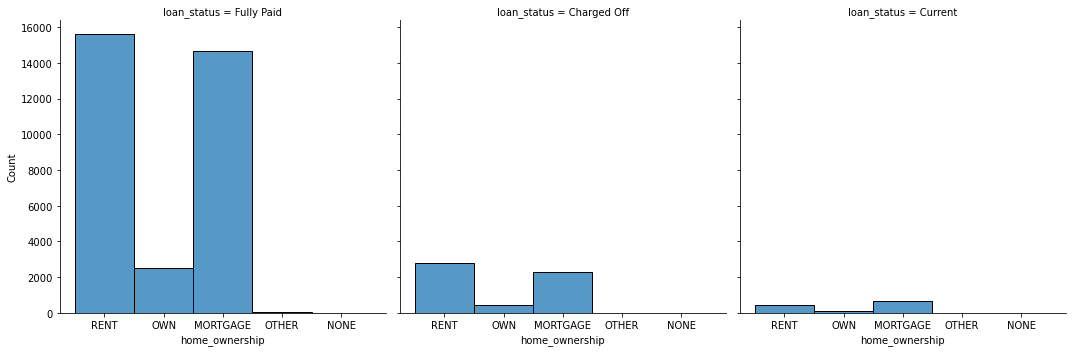

In [25]:
sns.displot(df, x="home_ownership", col="loan_status")

Plotting the histograms of the numeric variables. 

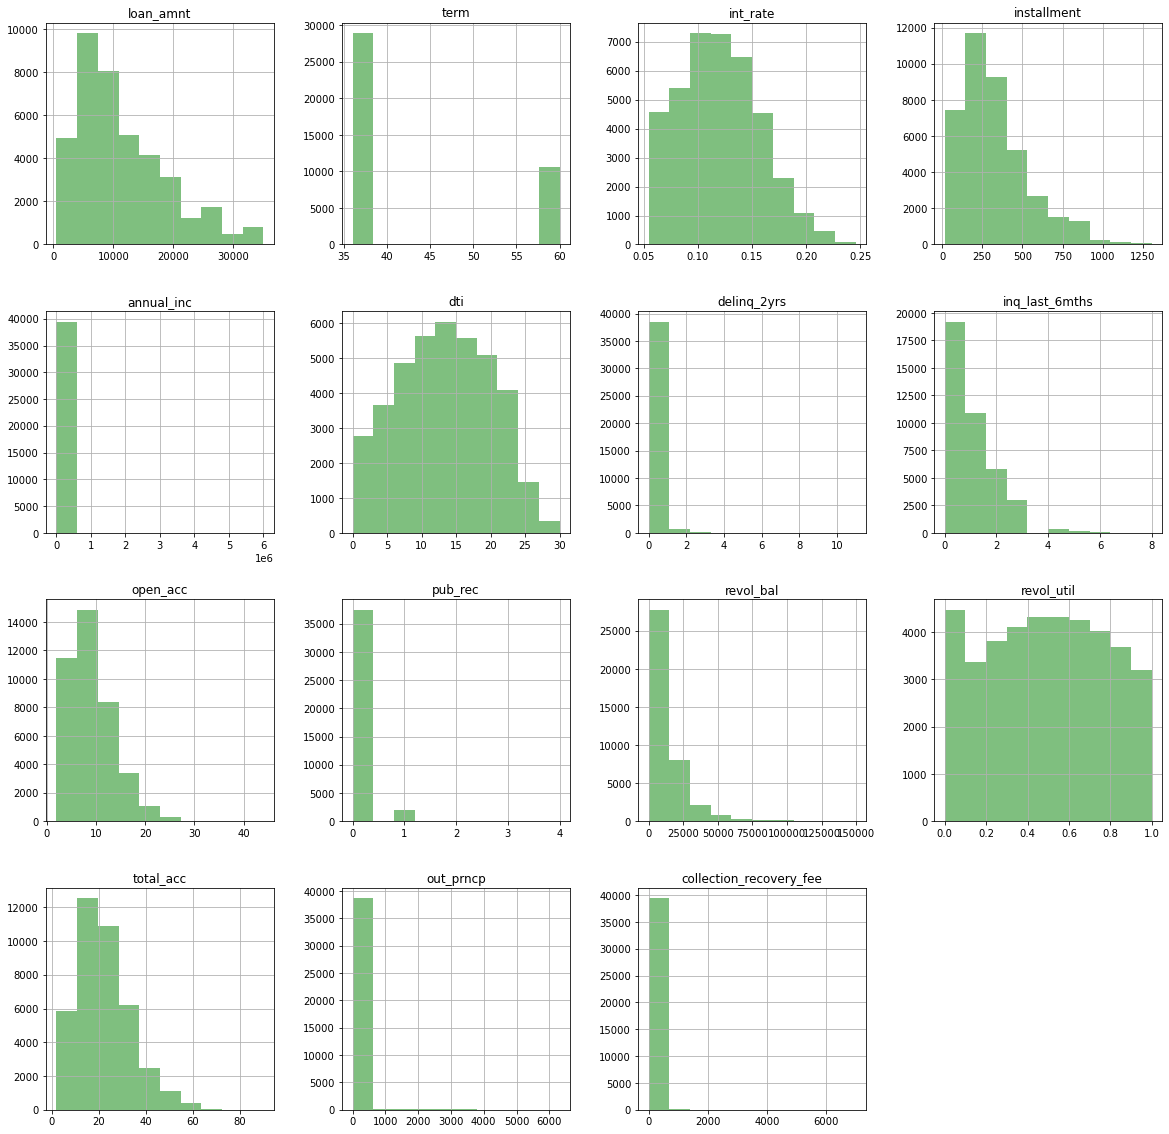

In [26]:
df.hist(alpha=0.5, figsize=(20, 20), color='green')
plt.show()

Plotting the pairplots of some variables as while trying for all the variables it was not loading and crashing. 

<Figure size 432x288 with 0 Axes>

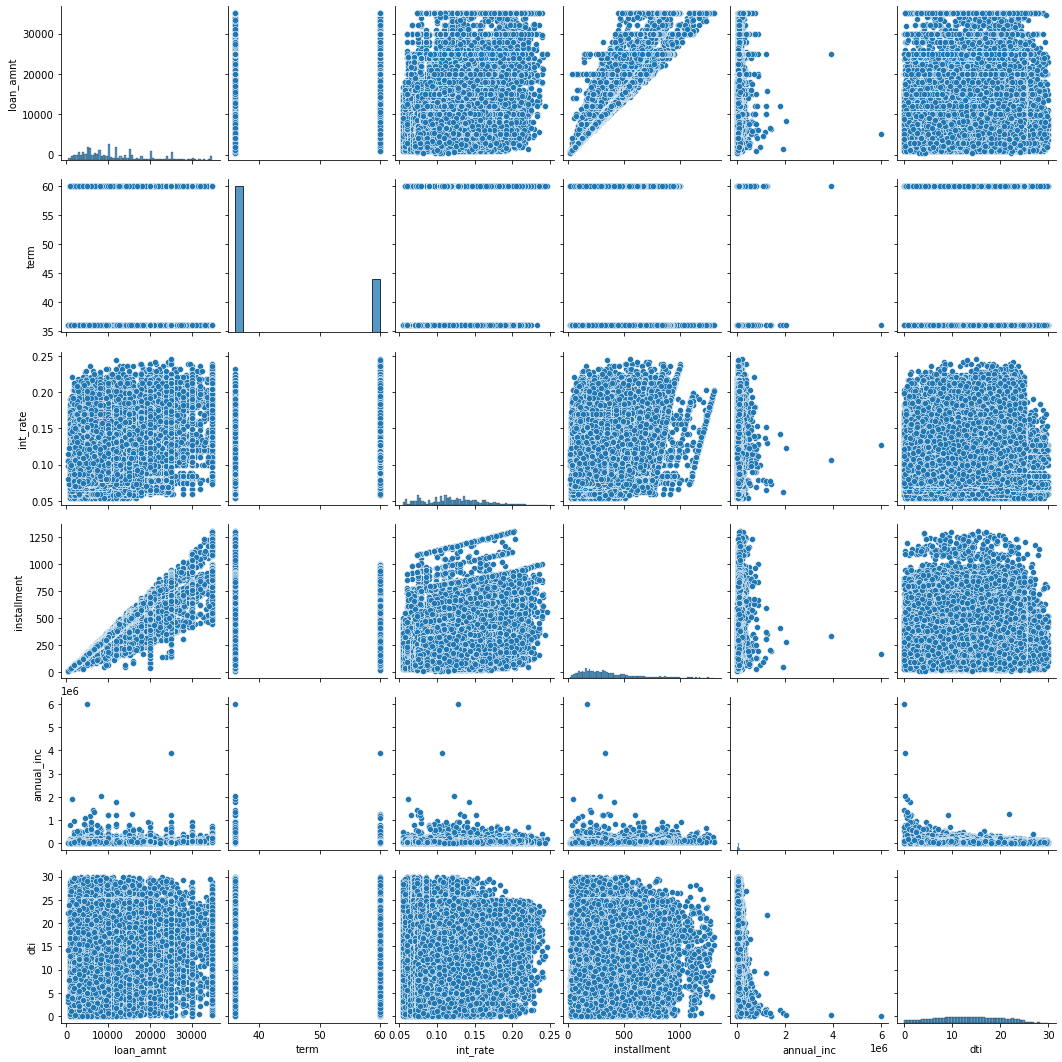

In [27]:
plt.figure()
sns.pairplot(df, vars=['loan_amnt', 'term', 'int_rate', 'installment','annual_inc', 'dti'])
plt.show()

* From the above plots it is clear that home ownership variable wasn't having a lot of influence in the data.
* Majority of the loan status is fully paid.
* Majority of the home owners are on rent followed by mortgaged and very few own their homes.

Plotting the boxplots of each variable.

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

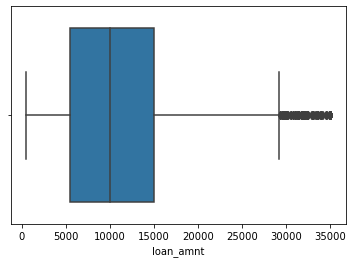

In [28]:
sns.boxplot(df["loan_amnt"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='term'>

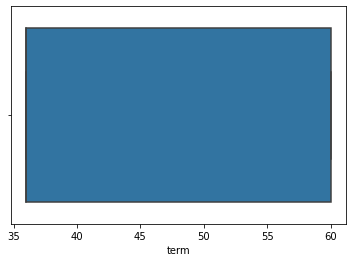

In [29]:
sns.boxplot(df["term"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='int_rate'>

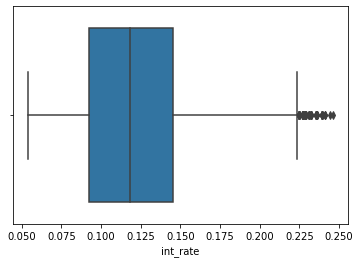

In [30]:
sns.boxplot(df["int_rate"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='installment'>

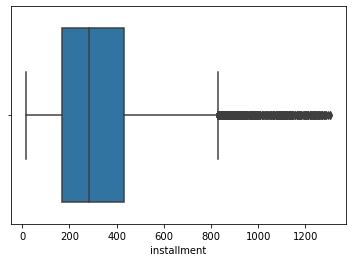

In [31]:
sns.boxplot(df["installment"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

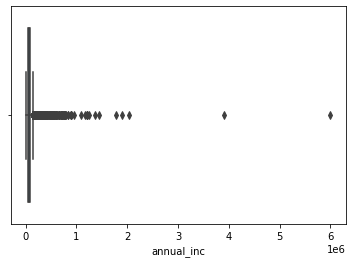

In [32]:
sns.boxplot(df["annual_inc"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dti'>

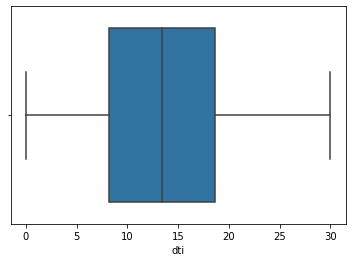

In [33]:
sns.boxplot(df["dti"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='inq_last_6mths'>

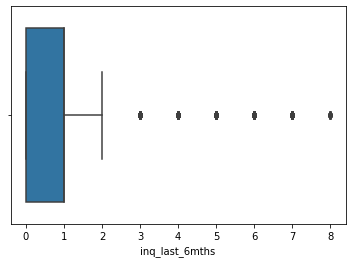

In [34]:
sns.boxplot(df["inq_last_6mths"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='open_acc'>

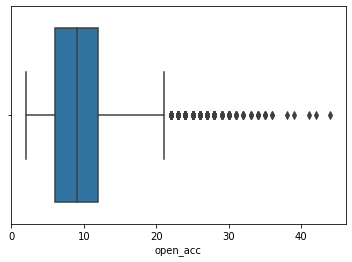

In [35]:
sns.boxplot(df["open_acc"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='revol_bal'>

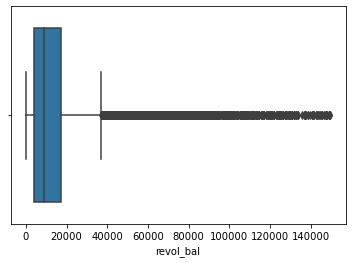

In [36]:
sns.boxplot(df["revol_bal"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='revol_util'>

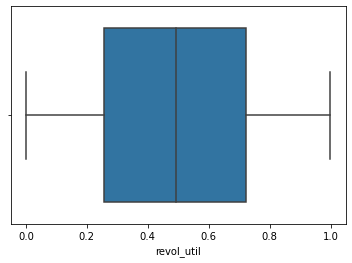

In [37]:
sns.boxplot(df["revol_util"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_acc'>

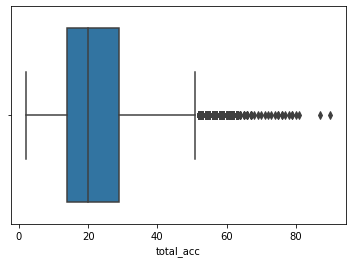

In [38]:
sns.boxplot(df["total_acc"])

from the boxplots it is clear that there are outliers in the above variables so checking the number of outliers in each variable using the below custom function.

In [39]:
#Defining a custom function to get the number of outliers present as doing the steps again would just add extra lines 
def outlier_func(i):
    x=i.quantile(0.25)-((i.quantile(0.75)-i.quantile(0.25))*1.5)
    y=i.quantile(0.75)+((i.quantile(0.75)-i.quantile(0.25))*1.5)
    outliers= np.where(i > y, True, np.where(i < x, True, False))
    return(outliers)

In [40]:
sum(outlier_func(df["loan_amnt"]))

1228

In [41]:
sum(outlier_func(df["int_rate"]))

94

In [42]:
sum(outlier_func(df["installment"]))

1235

In [43]:
sum(outlier_func(df["annual_inc"]))

1899

In [44]:
sum(outlier_func(df["inq_last_6mths"]))

3609

In [45]:
sum(outlier_func(df["open_acc"]))

514

In [46]:
sum(outlier_func(df["revol_bal"]))

2484

In [47]:
sum(outlier_func(df["total_acc"]))

711

Using winsorization to rectify the outliers to avoid data lose.The module used for Winsorization is feature_engine

In [48]:
from feature_engine.outliers import Winsorizer

In [49]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['loan_amnt'])

df['loan_amnt']= winsor.fit_transform(df[['loan_amnt']])
sum(outlier_func(df['loan_amnt']))

0

In [50]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['int_rate'])

df['int_rate']= winsor.fit_transform(df[['int_rate']])
sum(outlier_func(df['int_rate']))

0

In [51]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['installment'])

df['installment']= winsor.fit_transform(df[['installment']])
sum(outlier_func(df['installment']))

0

In [52]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['annual_inc'])

df['annual_inc']= winsor.fit_transform(df[['annual_inc']])
sum(outlier_func(df['annual_inc']))

0

In [53]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['inq_last_6mths'])

df['inq_last_6mths']= winsor.fit_transform(df[['inq_last_6mths']])
sum(outlier_func(df['inq_last_6mths']))

0

In [54]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['open_acc'])

df['open_acc']= winsor.fit_transform(df[['open_acc']])
sum(outlier_func(df['open_acc']))

0

In [55]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['revol_bal'])

df['revol_bal']= winsor.fit_transform(df[['revol_bal']])
sum(outlier_func(df['revol_bal']))

0

In [56]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['total_acc'])

df['total_acc']= winsor.fit_transform(df[['total_acc']])
sum(outlier_func(df['total_acc']))

0

Dropping the home_ownership variable as it won't be of much help for model building. 

In [57]:
df.drop(['home_ownership'],axis=1,inplace=True)
df.head()

,loan_status,loan_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,collection_recovery_fee
0,Fully Paid,5000.0,36,0.1065,162.87,24000.0,27.65,0,1.0,3.0,0,13648.0,0.837,9.0,0.00,0.00
1,Charged Off,2500.0,60,0.1527,59.83,30000.0,1.00,0,2.5,3.0,0,1687.0,0.094,4.0,0.00,1.11
2,Fully Paid,2400.0,36,0.1596,84.33,12252.0,8.72,0,2.0,2.0,0,2956.0,0.985,10.0,0.00,0.00
3,Fully Paid,10000.0,36,0.1349,339.31,49200.0,20.00,0,1.0,10.0,0,5598.0,0.210,37.0,0.00,0.00
4,Current,3000.0,60,0.1269,67.79,80000.0,17.94,0,0.0,15.0,0,27783.0,0.539,38.0,524.06,0.00


Encoding the  output categorical variable using a object mapper. 

In [58]:
prog_mapper = {"Fully Paid":1, "Charged Off":2, "Current":3}    
df["loan_status"] = df["loan_status"].replace(prog_mapper)
df.head()

,loan_status,loan_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,collection_recovery_fee
0,1,5000.0,36,0.1065,162.87,24000.0,27.65,0,1.0,3.0,0,13648.0,0.837,9.0,0.00,0.00
1,2,2500.0,60,0.1527,59.83,30000.0,1.00,0,2.5,3.0,0,1687.0,0.094,4.0,0.00,1.11
2,1,2400.0,36,0.1596,84.33,12252.0,8.72,0,2.0,2.0,0,2956.0,0.985,10.0,0.00,0.00
3,1,10000.0,36,0.1349,339.31,49200.0,20.00,0,1.0,10.0,0,5598.0,0.210,37.0,0.00,0.00
4,3,3000.0,60,0.1269,67.79,80000.0,17.94,0,0.0,15.0,0,27783.0,0.539,38.0,524.06,0.00


__CORRELATION CHART__

<AxesSubplot:>

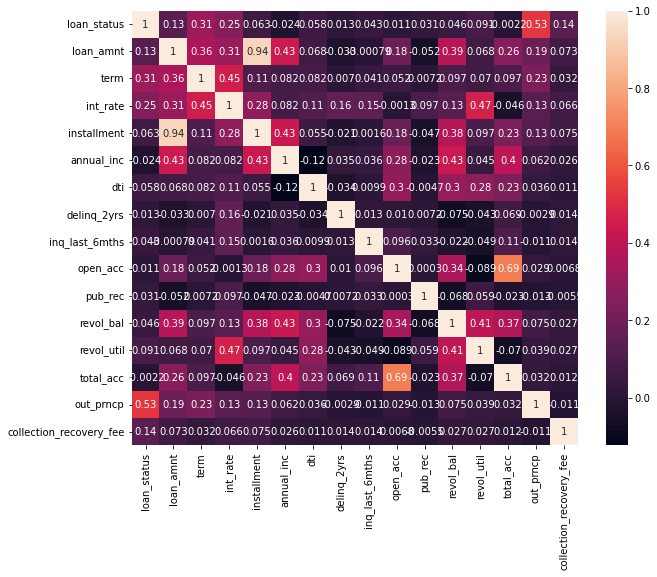

In [59]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

from the correlation chart it is clear that no variable has a very strong relation with the output variable

__TRAIN TEST SPLIT__

Using the train test split function to split the data into train and test dataset. 

In [60]:
df_train, df_test = train_test_split(df, test_size = 0.3,random_state=497) 

#### MODEL BUILDING

Importing the library required for building the model. 

In [61]:
from sklearn.linear_model import LogisticRegression

Fitting the model on the training data. 

In [62]:
model = LogisticRegression(multi_class = "multinomial", solver = "newton-cg",C= 0.05, penalty='l2').fit(df_train.iloc[:, 1:], df_train.iloc[:, 0])

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Checking the parameters that can be tuned to get a better result.

In [63]:
params = model.get_params()
print(params)

{'C': 0.05, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Loading the libraries required for getting the accuracy scores of the model.

In [64]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

__TEST DATASET__

Predicting the test dataset using the model.

In [65]:
test_predict = model.predict(df_test.iloc[:, 1:]) 

__Accuracy Score__

In [66]:
accuracy_score(df_test.iloc[:,0], test_predict)

0.9462057335581787

__Confusion Matrix__

In [67]:
confmtrx = np.array(confusion_matrix(df_test.iloc[:,0], test_predict))
pd.DataFrame(confmtrx, index=['Fully Paid','Charged Off', 'Current'],
columns=['predicted_Fully Paid', 'predicted_Charged Off', 'predicted_Current'])

,predicted_Fully Paid,predicted_Charged Off,predicted_Current
Fully Paid,9876,3,0
Charged Off,633,1022,0
Current,1,1,324


__Classification Report__

In [68]:
print(classification_report(y_pred=test_predict, y_true=df_test.iloc[:,0]))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97      9879
           2       1.00      0.62      0.76      1655
           3       1.00      0.99      1.00       326

    accuracy                           0.95     11860
   macro avg       0.98      0.87      0.91     11860
weighted avg       0.95      0.95      0.94     11860



__TRAIN DATASET__

Predicting the output on the train dataset using the model.

In [69]:
train_predict = model.predict(df_train.iloc[:, 1:]) 

__Accuracy Score__

In [70]:
accuracy_score(df_train.iloc[:,0], train_predict) 

0.9447435943767843

__Confusion Matrix__

In [71]:
confmtrx = np.array(confusion_matrix(df_train.iloc[:,0], train_predict))
pd.DataFrame(confmtrx, index=['Fully Paid','Charged Off', 'Current'],
columns=['predicted_Fully Paid', 'predicted_Charged Off', 'predicted_Current'])

,predicted_Fully Paid,predicted_Charged Off,predicted_Current
Fully Paid,22970,7,0
Charged Off,1518,2362,0
Current,4,0,810


__Classification Report__

In [72]:
print(classification_report(y_pred=train_predict, y_true=df_train.iloc[:,0]))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97     22977
           2       1.00      0.61      0.76      3880
           3       1.00      1.00      1.00       814

    accuracy                           0.94     27671
   macro avg       0.98      0.87      0.91     27671
weighted avg       0.95      0.94      0.94     27671



### CONCLUSION

From the accuracies of both the train and test data we can see that the accuracy is good and they also have proper fit. So this is a good model for predicting this dataset. 